In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

def is_stationary(series, test_method='ADF'):
    """
    Check if a time series is stationary.

    Parameters:
    - series: NumPy ndarray, the time series data to be tested for stationarity.
    - test_method: string, the method used to test for stationarity. Supports 'ADF' for Augmented Dickey-Fuller test
                   and 'KPSS' for Kwiatkowski-Phillips-Schmidt-Shin test.

    Returns:
    - is_stationary: boolean, True if the series is stationary, False otherwise.
    """
    is_stationary = False

    if test_method == 'ADF':
        # Perform Augmented Dickey-Fuller test
        result = adfuller(series)
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')
        is_stationary = result[1] <= 0.05

    elif test_method == 'KPSS':
        # Perform KPSS test
        statistic, p_value, _, critical_values = kpss(series, 'c')
        print(f'KPSS Statistic: {statistic}')
        print(f'p-value: {p_value}')
        print('Critical Values:')
        for key, value in critical_values.items():
            print(f'\t{key}: {value}')
        # In KPSS test, the null hypothesis is that the series is stationary
        is_stationary = p_value > 0.05

    # Print result
    if is_stationary:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

    return is_stationary



def make_stationary(df, column_names, test_method='ADF',plot=False):
    """
    Process the specified columns of a DataFrame to ensure stationarity.
    If a series is not stationary, it is differenced up to a maximum of 5 times.

    Parameters:
    - df: pandas DataFrame, the DataFrame containing the time series data.
    - column_names: list of strings, the names of the columns to be processed for stationarity.
    - test_method: string, the method used to test for stationarity. Supports 'ADF' and 'KPSS'.

    Returns:
    - The DataFrame with the processed columns where necessary.
    """
    modified_df = df.copy()  # Copy the DataFrame to avoid modifying the original

    for column in column_names:
        for i in range(1, 6):  # Maximum of 5 differencing operations
            # Ensure the series does not have NaN values
            series = modified_df[column].dropna()
            if is_stationary(series.values, test_method):
                print(f"Series in column '{column}' is stationary after {i-1} differencing operation(s).")
                break
            else:
                if i < 5:  # Only difference if we haven't reached the max differencing order
                    modified_df[column] = modified_df[column].diff().dropna()  # Drop NaN after differencing
                    if plot:
                        plt.figure(figsize=(10, 6))
                        plt.plot(df[column], label='Original')
                        plt.plot(modified_df[column], label='Differenced', linestyle='--')
                        plt.legend()
                        plt.title(f"Original vs Differenced Data for {column} (Order {i})")
                        plt.show()
                else:
                    print(f"Series in column '{column}' is not stationary after 5 differencing operations.")

    # drop NaN values
    modified_df = modified_df.dropna()
    return modified_df





ADF Statistic: -10.08442591366971
p-value: 1.1655044784188918e-17
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
The series is stationary.
Series in column 'stationary_series' is stationary after 0 differencing operation(s).
ADF Statistic: -1.8975904890519302
p-value: 0.3331954683868472
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
The series is not stationary.


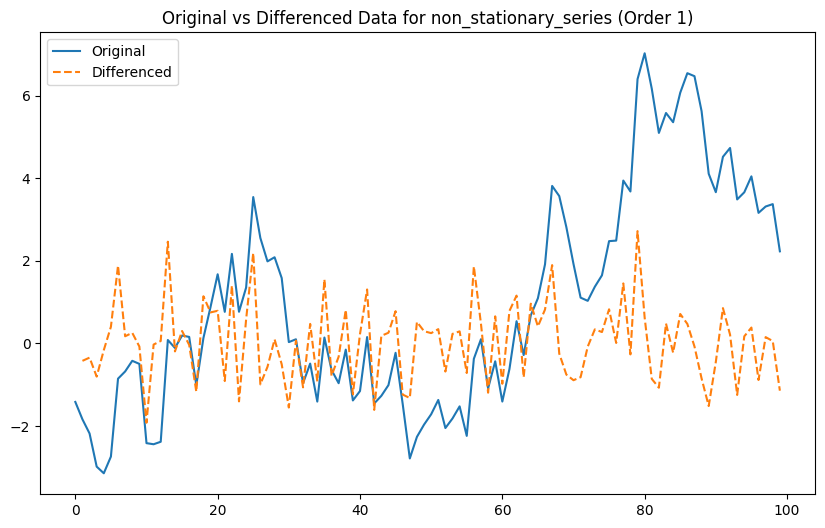

ADF Statistic: -10.809982939729169
p-value: 1.9196947925176545e-19
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
The series is stationary.
Series in column 'non_stationary_series' is stationary after 1 differencing operation(s).
Original Data:
   stationary_series  non_stationary_series
0           0.496714              -1.415371
1          -0.138264              -1.836016
2           0.647689              -2.178731
3           1.523030              -2.981008
4          -0.234153              -3.142294


In [25]:
# Generating test data for the make_stationary function
np.random.seed(42)  # For reproducibility

# Creating a DataFrame with a stationary series and a non-stationary series
df_test = pd.DataFrame({
    'stationary_series': np.random.normal(0, 1, 100),
    'non_stationary_series': np.cumsum(np.random.normal(0, 1, 100))
})

# List of columns to process for stationarity
column_names = ['stationary_series', 'non_stationary_series']

# Now, let's apply the make_stationary function to this test data
# Please note, the make_stationary function and is_stationary function need to be defined in this environment to run this code block
modified_df_test = make_stationary(df_test, column_names, 'ADF',plot=True)

# For demonstration purposes, we will print the first few rows of the original and modified data to observe the changes
print("Original Data:")
print(df_test.head())



In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Set random seed for reproducibility
np.random.seed(42)

# Generate some synthetic data
n = 100  # Number of observations
t = np.arange(n)

# Time series 1: Random walk
x = np.random.normal(0, 1, n).cumsum()

# Time series 2: Influenced by time series 1 with some lag plus noise
y = 0.5*x[:-1] + np.random.normal(0, 1, n-1)
y = np.insert(y, 0, 0)  # Insert a starting value for alignment

# Combine into a DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

# Display the first few rows of the DataFrame
df.head()


,X,Y
0,0.496714,0.000000
1,0.358450,-1.167014
2,1.006138,-0.241420
3,2.529168,0.160355
4,2.295015,0.462307


((1, 0, 0),
 282.0232973924638,
 [282.0232973924638,
  286.62800362749124,
  291.1900065772282,
  295.79150784528855,
  300.3312833767991,
  299.9764258311104,
  304.58158375747155,
  309.0260460038097,
  312.9524349252305,
  317.2706351802886])

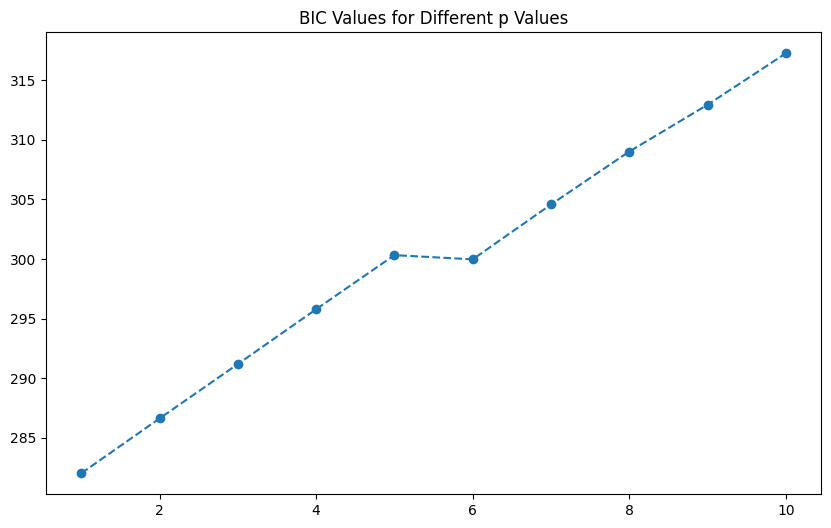

In [10]:
# Initialize variables to store the best BIC and corresponding order
best_bic = np.inf
best_order_bic = None
bic_values = []

p_range = range(1, 11)

for p in p_range:
    try:
        # Fit the ARIMA model with p, d=0 (to make it an AR model), and q=0
        model = ARIMA(df['X'], order=(p, 0, 0))
        model_fit = model.fit()
        
        # Get the BIC
        bic = model_fit.bic
        bic_values.append(bic)
        
        # Check if this model is better, based on BIC
        if bic < best_bic:
            best_bic = bic
            best_order_bic = (p, 0, 0)
    except Exception as e:
        print(f"Could not fit model for p={p}: {e}")
        bic_values.append(None)

# plot the BIC values for different p values
plt.figure(figsize=(10, 6))
plt.plot(p_range, bic_values, marker='o', linestyle='--')
plt.title("BIC Values for Different p Values")

best_order_bic, best_bic, bic_values


((1, 0, 0),
 274.20778683449953,
 [274.20778683449953,
  276.2073228835389,
  278.1641556472877,
  280.16048672936,
  282.0950920748825,
  279.13506434320567,
  281.1350520835787,
  282.9743441439288,
  284.29556287936146,
  286.0085929484315])

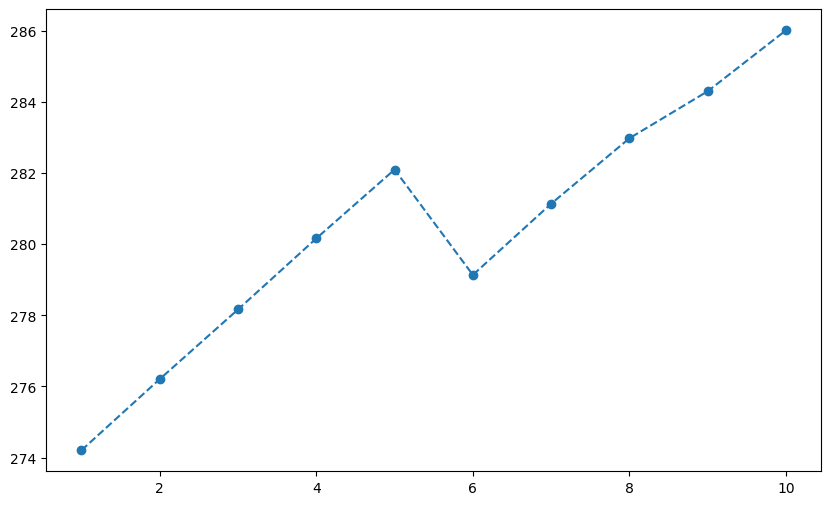

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Initialize variables to store the best AIC and corresponding order
best_aic = np.inf
best_order = None
aic_values = []

# Range of p values to test
p_range = range(1, 11)

for p in p_range:
    try:
        # Fit the ARIMA model with p, d=0 (to make it an AR model), and q=0
        model = ARIMA(df['X'], order=(p, 0, 0))
        model_fit = model.fit()
        
        # Get the AIC
        aic = model_fit.aic
        aic_values.append(aic)
        
        # Check if this model is better, based on AIC
        if aic < best_aic:
            best_aic = aic
            best_order = (p, 0, 0)
    except Exception as e:
        print(f"Could not fit model for p={p}: {e}")
        aic_values.append(None)

# Plot the AIC values for different p values
plt.figure(figsize=(10, 6))
plt.plot(p_range, aic_values, marker='o', linestyle='--')


best_order, best_aic, aic_values

# plot 


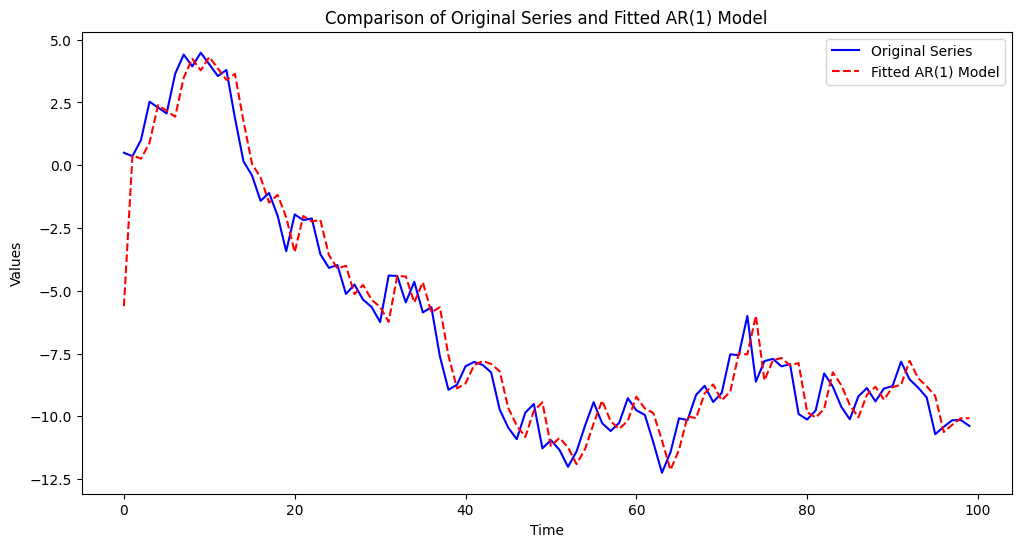

In [12]:
import matplotlib.pyplot as plt

# Fit the ARIMA model with the optimal order found by AIC (AR(1))
model = ARIMA(df['X'], order=(1, 0, 0))
model_fit = model.fit()

# Get the in-sample predictions
predictions = model_fit.predict()

# Plot the original series and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['X'], label='Original Series', color='blue')
plt.plot(predictions, label='Fitted AR(1) Model', color='red', linestyle='--')
plt.title('Comparison of Original Series and Fitted AR(1) Model')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


In [12]:
np.random.seed(42)
stationary_series = np.random.normal(0, 1, 100)

# Generating a non-stationary series (random walk)
non_stationary_series = np.cumsum(np.random.normal(0, 1, 100))

# Testing the function with both series
print("Testing with a stationary series (ADF Test):")
stationary_test_adf = is_stationary(stationary_series, 'ADF')

print("\nTesting with a non-stationary series (ADF Test):")
non_stationary_test_adf = is_stationary(non_stationary_series, 'ADF')

# print("\nTesting with a stationary series (KPSS Test):")
# stationary_test_kpss = is_stationary(stationary_series, 'KPSS')

# print("\nTesting with a non-stationary series (KPSS Test):")
# non_stationary_test_kpss = is_stationary(non_stationary_series, 'KPSS')

Testing with a stationary series (ADF Test):
ADF Statistic: -10.08442591366971
p-value: 1.1655044784188918e-17
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
The series is stationary.

Testing with a non-stationary series (ADF Test):
ADF Statistic: -1.8975904890519302
p-value: 0.3331954683868472
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
The series is not stationary.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests


def check_and_difference(data, column_names, plot=False):
    """
    Check if the data in the specified columns are stationary.
    If not, difference the data to make it stationary.
    Optionally plot the original and differenced data.

    Parameters:
    - data: pandas DataFrame containing the time series data.
    - column_names: list of strings, the names of the columns to check and difference.
    - plot: bool, whether to plot the original and differenced series for each column.

    Returns:
    - modified_data: pandas DataFrame with the differenced series where necessary.
    """
    # Copy the input DataFrame to avoid modifying the original data
    modified_data = data.copy()

    for column_name in column_names:
        # Perform Augmented Dickey-Fuller test
        result = adfuller(modified_data[column_name])
        print(f'ADF Statistic for {column_name}: {result[0]}')
        print(f'p-value for {column_name}: {result[1]}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')

        # Check if stationary
        if result[1] > 0.05:
            print(f"Data in {column_name} is not stationary. Differencing the data...")
            modified_data[column_name] = modified_data[column_name].diff().dropna()
        else:
            print(f"Data in {column_name} is stationary.")

        # Plot if required
        if plot:
            plt.figure(figsize=(10, 6))
            plt.plot(data[column_name], label='Original')
            plt.plot(modified_data[column_name], label='Differenced', linestyle='--')
            plt.legend()
            plt.title(f"Original vs Differenced Data for {column_name}")
            plt.show()

    return modified_data.dropna()



def gc_test(data, column_x, column_y, max_lags=4):
    """
    Perform Granger Causality test in both directions and format the result.
    
    Parameters:
    - data: pandas DataFrame containing the time series data.
    - column_x, column_y: names of the columns to be tested.
    - max_lags: int, maximum number of lags to test for.
    
    Returns:
    - Formatted result as a string.
    """
    result_xy = grangercausalitytests(data[[column_x, column_y]], max_lags, verbose=False)
    result_yx = grangercausalitytests(data[[column_y, column_x]], max_lags, verbose=False)
    
    # Initialize variables to store the best p-value and corresponding F statistic and lag
    best_p_xy, best_f_xy, best_lag_xy = 1, None, None
    best_p_yx, best_f_yx, best_lag_yx = 1, None, None
    
    for lag in range(1, max_lags + 1):
        # XY direction
        f_test_xy = result_xy[lag][0]['ssr_ftest']
        if f_test_xy[1] < best_p_xy:
            best_p_xy, best_f_xy, best_lag_xy = f_test_xy[1], f_test_xy[0], lag
        # YX direction
        f_test_yx = result_yx[lag][0]['ssr_ftest']
        if f_test_yx[1] < best_p_yx:
            best_p_yx, best_f_yx, best_lag_yx = f_test_yx[1], f_test_yx[0], lag
    
    # Determine if tests are passed
    test_passed_xy = "True" if best_p_xy < 0.05 else "False"
    test_passed_yx = "True" if best_p_yx < 0.05 else "False"
    
    # Format the result
    result_str = "Granger Causality Test\n------------------------------------------------------------\n"
    result_str += "Direction                   F-statistics         p-value         lag         Granger cause\n"
    result_str += f"{column_x} => {column_y}    {best_f_xy:.3f}               {best_p_xy:.3f}                {best_lag_xy}                {test_passed_xy}\n"
    result_str += f"{column_y} => {column_x}    {best_f_yx:.3f}               {best_p_yx:.3f}                {best_lag_yx}                {test_passed_yx}\n"
    print(result_str)
    
    return result_str


In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Generate random data
np.random.seed(42)  # For reproducibility
n = 100  # Number of observations

# Simulate two time series with some causal structure
time = np.arange(n)
series1 = np.random.normal(0, 1, n)  # Random noise
series2 = np.zeros(n)

# Introduce causality: series2 depends on series1 with some lag
for t in range(2, n):
    series2[t] = 0.5 * series1[t-2] + np.random.normal(0, 1)

# Combine into a DataFrame
data = pd.DataFrame({'Series1': series1, 'Series2': series2})

# Apply Granger Causality Test
gc_results = grangercausalitytests(data, maxlag=4, verbose=True)

gc_results



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2431  , p=0.2677  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=1.2819  , p=0.2575  , df=1
likelihood ratio test: chi2=1.2737  , p=0.2591  , df=1
parameter F test:         F=1.2431  , p=0.2677  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7414  , p=0.4792  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=1.5626  , p=0.4578  , df=2
likelihood ratio test: chi2=1.5502  , p=0.4606  , df=2
parameter F test:         F=0.7414  , p=0.4792  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0522  , p=0.3735  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=3.4022  , p=0.3337  , df=3
likelihood ratio test: chi2=3.3439  , p=0.3416  , df=3
parameter F test:         F=1.0522  , p=0.3735  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0754  , p=0.3737  , df_d

{1: ({'ssr_ftest': (1.2430766473661323, 0.2676622903089821, 96.0, 1),
   'ssr_chi2test': (1.281922792596324, 0.2575418304590975, 1),
   'lrtest': (1.273694123767882, 0.2590748071027003, 1),
   'params_ftest': (1.2430766473661308, 0.2676622903089821, 96.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7414257852658382, 0.47922886853038926, 93.0, 2),
   'ssr_chi2test': (1.5625747732484334, 0.45781624524773035, 2),
   'lrtest': (1.5502482817250325, 0.4606465923840235, 2),
   'params_ftest': (0.7414257852658386, 0.47922886853038926, 93.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0522330928873147, 0.3735341678735011, 90.0, 3),
   'ssr_chi2test': (3.402220333668985, 0.33366698774063014, 3),
   'lrtest': (3.343914308529037, 0.3415772093763534, 3),
   'params_ftest': (1.0522330928873187, 0.3735341678734993, 90.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

In [5]:
# Generating example data
np.random.seed(42)
time = pd.date_range(start='1/1/2020', periods=100, freq='D')
series_1 = np.random.normal(0, 1, 100).cumsum()  # Random walk (non-stationary)
series_2 = np.random.normal(0, 1, 100)  # White noise (stationary)



ValueError: Insufficient observations. Maximum allowable lag is -1